# Déclaration des bib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The data 

In [2]:
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Manipulation des données

In [ ]:
sales.shape

In [ ]:
sales.info()

In [ ]:
sales.describe()
#description des donnees pour afficher la moyenne...

# Numerical analysis and visualisation

In [ ]:
sales['Unit_Cost'].describe()

In [ ]:
sales['Unit_Cost'].mean()

In [ ]:
sales['Revenue'].mean()

In [ ]:
sales['Revenue'].max()

In [ ]:
sales['Revenue'].min()

In [ ]:
sales['Revenue'].std()

In [ ]:
sales['Unit_Cost'].median()

# Visualisation

In [ ]:
sales['Unit_Cost'].describe()

In [ ]:
# Boxplot
sales['Unit_Cost'].plot(kind='box', vert=False, color='green',figsize=(14,6))


In [ ]:
ay=sales['Unit_Cost'].plot(kind='box', vert=False, color='red',figsize=(14,6))
ay.axvline(sales['Unit_Cost'].mean(), color='green')
sales['Unit_Cost'].describe()

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=True, color='red',figsize=(14,6))

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')
ax.axvline(sales['Unit_Cost'].max(), color='black')
ax.axvline(sales['Unit_Cost'].min(), color='black')
ax.axvline(sales['Unit_Cost'].std(), color='green')

In [ ]:
ax = sales['Revenue'].plot(kind='density', figsize=(20,10)) 
ax.axvline(sales['Revenue'].mean(), color='red')
ax.axvline(sales['Revenue'].median(), color='green')

In [ ]:
sales['Revenue'].std()

In [ ]:
sales['Revenue'].describe()

In [ ]:
ax = sales['Revenue'].plot(kind='box',vert=False, figsize=(14,6)) 


In [ ]:
salaire = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
salaire.set_ylabel('Number of Sales')
salaire.set_xlabel('dollars')

In [ ]:
ax = sales['Revenue'].plot(kind='density', figsize=(14,6))
ax


# ## Categorical analysis and visualization

We'll analyze the `Age_Group` column:

In [ ]:
sales.head()

In [ ]:
sales['Age_Group'].describe()

In [ ]:
d1 = sales['Age_Group'].value_counts()
d1

In [ ]:
d1.plot(kind='pie', figsize=(6,6))

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
d1 = sales['Age_Group'].value_counts()
ax = d1.plot(kind='bar',color='red', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In [ ]:
sales.head()

# Relationship between the columns?¶
Can we find any significant relationship?

In [19]:
# Seleziona solo le colonne numeriche
sales_numeric = sales.select_dtypes(include=[np.number])
Corr = sales_numeric.corr()

In [16]:
Corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


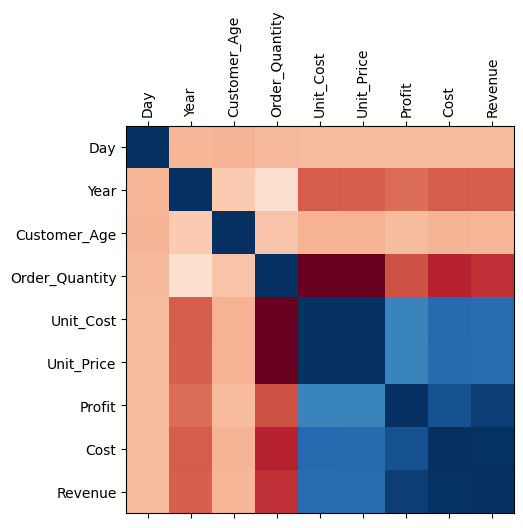

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.matshow(Corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(Corr.columns)), Corr.columns, rotation='vertical');
plt.yticks(range(len(Corr.columns)), Corr.columns);

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

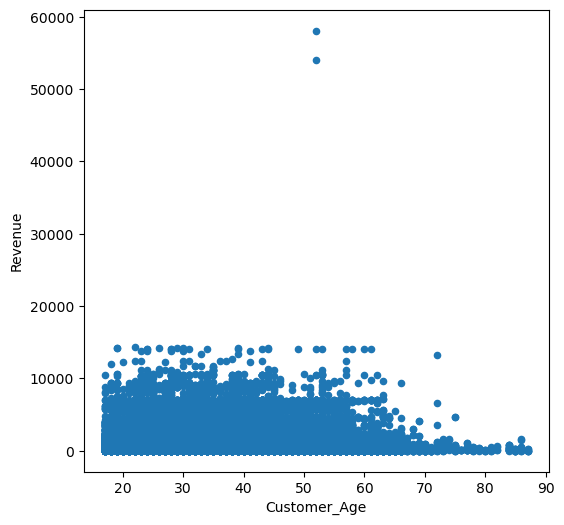

In [20]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Cost', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Revenue', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Customer_Age', figsize=(6,6))

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')
#ay=sales['Unit_Cost'].plot(kind='box', vert=False, color='red',figsize=(14,6))

In [ ]:
ax = sales[['Revenue', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6), color='red')
ax.set_ylabel('Revenue')

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

# Column wrangling¶
We can also create new columns or modify existing ones.

Add and calculate a new Revenue_per_Age column

In [ ]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

In [ ]:
sal = sales['Revenue_per_Age']
sal = sales['Revenue'] / sales['Customer_Age']
sal.head()

In [ ]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

In [ ]:
sal.plot(kind='density', figsize=(14,6))

In [ ]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

In [ ]:
sal.plot(kind='hist', figsize=(14,6))

# Add and calculate a new Calculated_Cost column¶
Use this formula

𝐶𝑎𝑙𝑐𝑢𝑙𝑎𝑡𝑒𝑑_𝐶𝑜𝑠𝑡=𝑂𝑟𝑑𝑒𝑟_𝑄𝑢𝑎𝑛𝑡𝑖𝑡𝑦∗𝑈𝑛𝑖𝑡_𝐶𝑜𝑠𝑡

In [ ]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

In [ ]:
Hiba = sales['Calculated_Cost']
Hiba = sales['Order_Quantity'] * sales['Unit_Cost']
Hiba.head()

In [ ]:
sales['Calculated_Cost']

In [ ]:
sales['Cost']

In [ ]:
sales['Calculated_Cost'] != sales['Cost']

In [ ]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

In [ ]:
(sales['Calculated_Cost'] != sales['Profit']).sum()

In [ ]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

# Add and calculate a new Calculated_Revenue column¶
Use this formula

𝐶𝑎𝑙𝑐𝑢𝑙𝑎𝑡𝑒𝑑_𝑅𝑒𝑣𝑒𝑛𝑢𝑒=𝐶𝑜𝑠𝑡+𝑃𝑟𝑜𝑓𝑖𝑡

In [ ]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

In [ ]:
sales.head()

In [ ]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

# Modify all Unit_Price values adding 3% tax to them¶

In [ ]:
sales['Unit_Price'].head()

In [ ]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [ ]:
sales['Unit_Price'].head()

# Selection & Indexing:¶
Get all the sales made in the state of Kentucky

In [ ]:
ndata=sales.loc[sales['State'] == 'Kentucky']

In [ ]:
ndata

In [ ]:
ndata.shape

# Get the mean revenue of the Adults (35-64) sales group

In [ ]:
ndata1=sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

In [ ]:
ndata1

# How many records belong to Age Group Youth (<25) or Adults (35-64)?¶

In [ ]:
ndata2=sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

In [ ]:
ndata2

# Get the mean revenue of the sales group Adults (35-64) in United States

In [ ]:
ndata3=sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

In [ ]:
ndata3

# Increase the revenue by 10% to every sale made in France¶

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

In [ ]:
sales.loc[ (sales['Country'] == 'France'), 'Revenue']*= 1.1

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

In [ ]:
A = np.array([
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
])

print(A[:1, :2])

In [ ]:
a = np.arange(5)

In [ ]:
a

In [ ]:
a + 20

In [ ]:
b = np.array([0, .5, 1, 1.5, 2])

In [ ]:
b

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
a

In [ ]:
a

In [ ]:
a[0], a[1]

In [ ]:

a[0:]

In [ ]:
a[:2]

In [ ]:
a[1:]

In [ ]:

a[:5]

In [ ]:
a[1:3]

In [ ]:

a[1:-1]

In [ ]:
a

In [ ]:
a[3:-1]

In [ ]:

a[4:-1]

In [ ]:

a[3:-1]

In [ ]:
a

In [ ]:
[::2]

In [ ]:
a[::2]

In [ ]:
a[-1]

In [ ]:
a.ndim

In [ ]:
A.ndim

In [ ]:
A


In [ ]:
a = np.arange(5)
a + 20

In [ ]:
a = np.arange(5)

print(a <= 3)

In [ ]:
certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned)

In [ ]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})

certificates_earned.index = ['Tom', 'Kris', 'Ahmad', 'Beau']

print(certificates_earned.iloc[2])

In [ ]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})
names = ['Tom', 'Kris', 'Ahmad', 'Beau']

certificates_earned.index = names
longest_streak = pd.Series([13, 11, 9, 7], index=names)
certificates_earned['Longest streak'] = longest_streak

print(certificates_earned)